In [1]:
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
import numba as nb
import imageio
import shutil
import sys
import os

if "ipykernel_launcher.py" in sys.argv[0]:
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm

randomSeed = 100

%matplotlib inline
%config InlineBackend.figure_format = "retina"

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.jet(np.linspace(0, 1, 256)) * 0.85, N=256
)

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns

sns.set_theme(
    style="ticks", 
    font_scale=1.1, 
    rc={
        'figure.figsize': (6.5, 5),
        'axes.facecolor': 'white',
        'figure.facecolor': 'white',
        'grid.color': '#dddddd',
        'grid.linewidth': 0.5,
        "lines.linewidth": 1.5,
        'text.color': '#000000',
        'figure.titleweight': "bold",
        'xtick.color': '#000000',
        'ytick.color': '#000000',
        'axes.spines.right': False,
        'axes.spines.top': False,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
        'axes.grid': True
    }
)

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['animation.ffmpeg_path'] = "/opt/conda/bin/ffmpeg"

from main import *

SAVE_PATH = "/home/thanmark/MS_DATA"

In [ ]:
Ks = np.linspace(0.1, 1.3, 13).round(2)

models = [
    ChiralSolvable2D(agentsNum=1000, dt=0.1, K=K, distribution="cauchy", 
                     savePath=SAVE_PATH, tqdm=True, overWrite=True)
    for K in Ks
]

In [ ]:
totalTvSxp = dict()
totalTvSxm = dict()
totalTvSyp = dict()
totalTvSym = dict()

for model in tqdm(models):
    sa = StateAnalysis(model)
    teilcounts = 200
    tailX = sa.totalPositionX[-teilcounts:, :, 0]
    tailY = sa.totalPositionX[-teilcounts:, :, 1]
    tailTheta = sa.totalPhaseTheta[-teilcounts:, :]
    tvSxp = np.abs(np.exp(1j * (tailX + tailTheta)).sum(axis=1)) / sa.model.agentsNum
    tvSxm = np.abs(np.exp(1j * (tailX - tailTheta)).sum(axis=1)) / sa.model.agentsNum
    tvSyp = np.abs(np.exp(1j * (tailY + tailTheta)).sum(axis=1)) / sa.model.agentsNum
    tvSym = np.abs(np.exp(1j * (tailY - tailTheta)).sum(axis=1)) / sa.model.agentsNum
    totalTvSxp[model.K] = tvSxp.mean()
    totalTvSxm[model.K] = tvSxm.mean()
    totalTvSyp[model.K] = tvSyp.mean()
    totalTvSym[model.K] = tvSym.mean()

  0%|          | 0/13 [00:00<?, ?it/s]

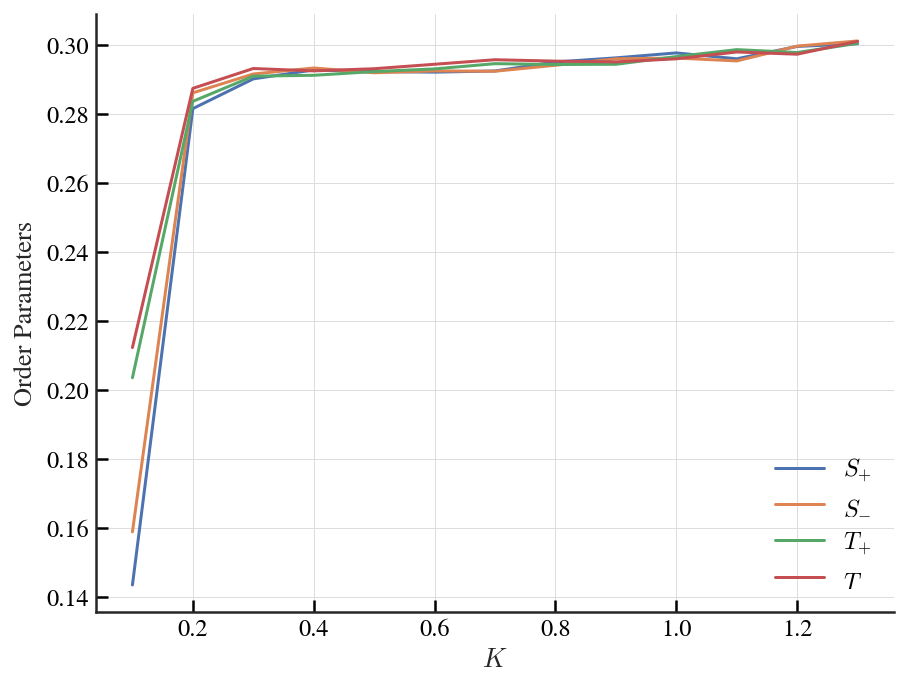

In [45]:
plt.plot(totalTvSxp.keys(), totalTvSxp.values(), label="$S_{+}$")
plt.plot(totalTvSxm.keys(), totalTvSxm.values(), label="$S_{-}$")
plt.plot(totalTvSyp.keys(), totalTvSyp.values(), label="$T_{+}$")
plt.plot(totalTvSym.keys(), totalTvSym.values(), label="$T_{-}$")

plt.legend(frameon=False)
plt.xlabel(r"$K$")
plt.ylabel(r"Order Parameters")
plt.tight_layout()

In [47]:
model = models[-1]

sa = StateAnalysis(model)
teilcounts = 0
tailX = sa.totalPositionX[-teilcounts:, :, 0]
tailY = sa.totalPositionX[-teilcounts:, :, 1]
tailTheta = sa.totalPhaseTheta[-teilcounts:, :]

Text(0, 0.5, 'Order Parameters')

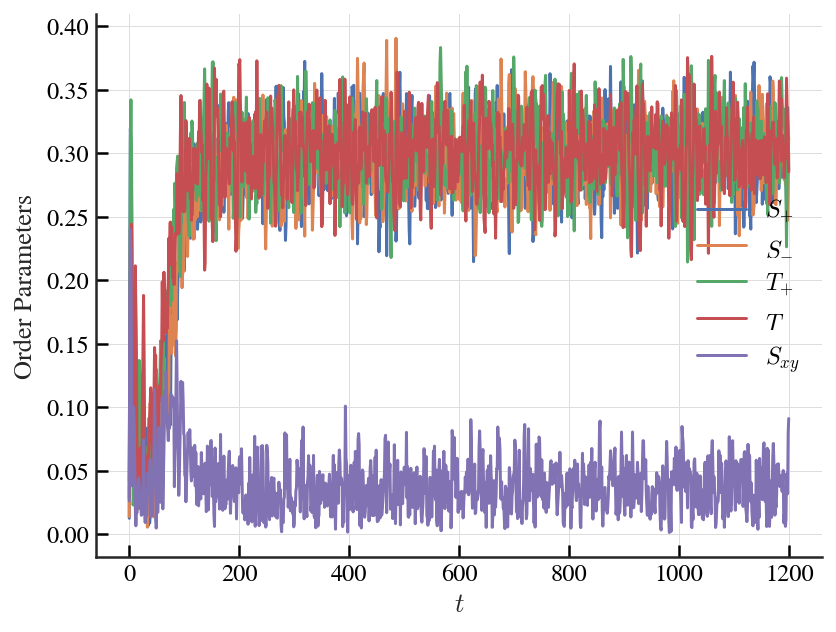

In [59]:
tvSxp = np.abs(np.exp(1j * (tailX + tailTheta)).sum(axis=1)) / sa.model.agentsNum
tvSxm = np.abs(np.exp(1j * (tailX - tailTheta)).sum(axis=1)) / sa.model.agentsNum
tvSyp = np.abs(np.exp(1j * (tailY + tailTheta)).sum(axis=1)) / sa.model.agentsNum
tvSym = np.abs(np.exp(1j * (tailY - tailTheta)).sum(axis=1)) / sa.model.agentsNum
tvSxy = np.abs(np.exp(1j * (tailX + tailY - tailTheta)).sum(axis=1)) / sa.model.agentsNum
plt.plot(tvSxp, label="$S_{+}$")
plt.plot(tvSxm, label="$S_{-}$")
plt.plot(tvSyp, label="$T_{+}$")
plt.plot(tvSym, label="$T_{-}$")
plt.plot(tvSxy, label="$S_{xy}$")
plt.legend(frameon=False)
plt.xlabel(r"$t$")
plt.ylabel(r"Order Parameters")

In [3]:
Ks = np.concatenate([
    np.linspace(0, 20, 41).round(2),
    np.linspace(20, 40, 41).round(2)
])
Ks = np.unique(Ks)

models = [
    ChiralSolvable2D(agentsNum=3000, dt=0.01, K=K, distribution="cauchy", 
                     savePath=SAVE_PATH, tqdm=True, overWrite=True)
    for K in Ks
]

totalTvSxypp = dict()
totalTvSxypm = dict()
totalTvSxymp = dict()
totalTvSxymm = dict()
totalR = dict()

for model in tqdm(models):
    sa = StateAnalysis(model)
    teilcounts = 200
    tailX = sa.totalPositionX[-teilcounts:, :, 0]
    tailY = sa.totalPositionX[-teilcounts:, :, 1]
    tailTheta = sa.totalPhaseTheta[-teilcounts:, :]
    tvSxypp = np.abs(np.exp(1j * (tailX + tailY + tailTheta)).sum(axis=1)) / sa.model.agentsNum
    tvSxypm = np.abs(np.exp(1j * (tailX + tailY - tailTheta)).sum(axis=1)) / sa.model.agentsNum
    tvSxymp = np.abs(np.exp(1j * (tailX - tailY + tailTheta)).sum(axis=1)) / sa.model.agentsNum
    tvSxymm = np.abs(np.exp(1j * (tailX - tailY - tailTheta)).sum(axis=1)) / sa.model.agentsNum
    tvR = np.abs(np.exp(1j * tailTheta).sum(axis=1)) / sa.model.agentsNum
    totalTvSxypp[model.K] = tvSxypp.mean()
    totalTvSxypm[model.K] = tvSxypm.mean()
    totalTvSxymp[model.K] = tvSxymp.mean()
    totalTvSxymm[model.K] = tvSxymm.mean()
    totalR[model.K] = tvR.mean()

  0%|          | 0/81 [00:00<?, ?it/s]

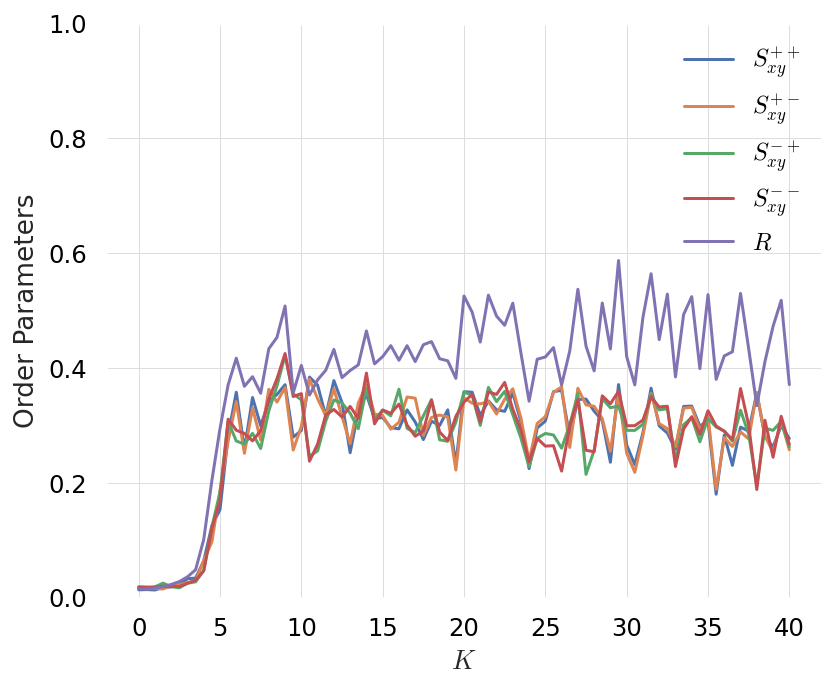

In [4]:
plt.plot(totalTvSxypp.keys(), totalTvSxypp.values(), label="$S_{xy}^{++}$")
plt.plot(totalTvSxypm.keys(), totalTvSxypm.values(), label="$S_{xy}^{+-}$")
plt.plot(totalTvSxymp.keys(), totalTvSxymp.values(), label="$S_{xy}^{-+}$")
plt.plot(totalTvSxymm.keys(), totalTvSxymm.values(), label="$S_{xy}^{--}$")
plt.plot(totalR.keys(), totalR.values(), label="$R$")

plt.legend(frameon=False)
plt.xlabel(r"$K$")
plt.ylabel(r"Order Parameters")
plt.ylim(0, 1)
plt.tight_layout()

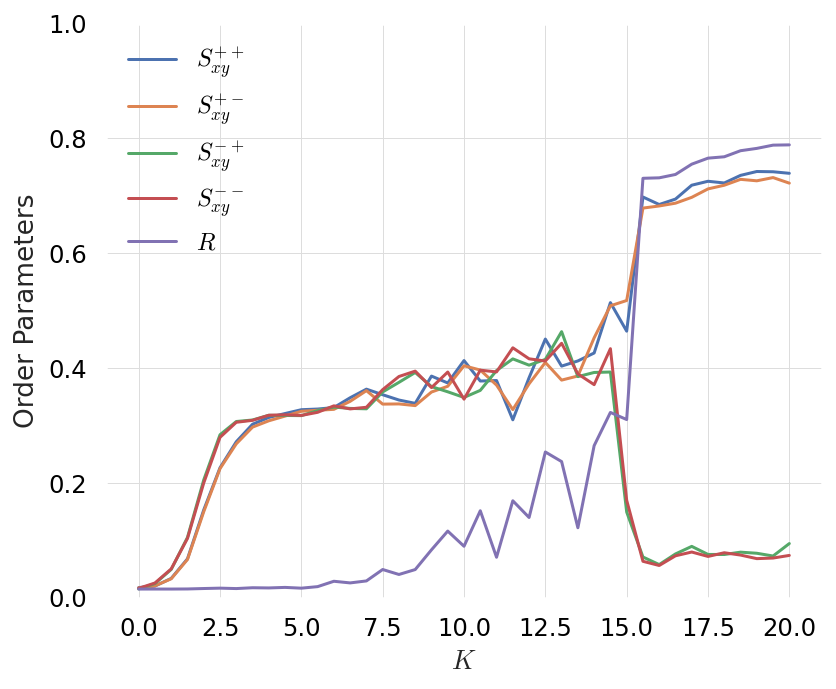

2.5


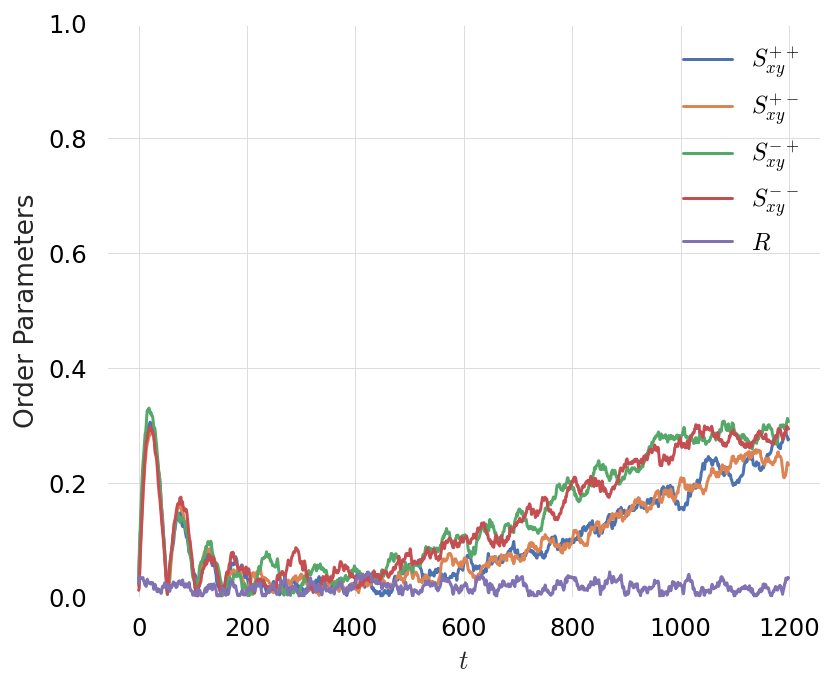

In [67]:
model = models[5]
sa = StateAnalysis(model)
print(sa.model.K)
teilcounts = 0
tailX = sa.totalPositionX[-teilcounts:, :, 0]
tailY = sa.totalPositionX[-teilcounts:, :, 1]
tailTheta = sa.totalPhaseTheta[-teilcounts:, :]
tvSxypp = np.abs(np.exp(1j * (tailX + tailY + tailTheta)).sum(axis=1)) / sa.model.agentsNum
tvSxypm = np.abs(np.exp(1j * (tailX + tailY - tailTheta)).sum(axis=1)) / sa.model.agentsNum
tvSxymp = np.abs(np.exp(1j * (tailX - tailY + tailTheta)).sum(axis=1)) / sa.model.agentsNum
tvSxymm = np.abs(np.exp(1j * (tailX - tailY - tailTheta)).sum(axis=1)) / sa.model.agentsNum
tvR = np.abs(np.exp(1j * tailTheta).sum(axis=1)) / sa.model.agentsNum
plt.plot(tvSxypp, label="$S_{xy}^{++}$")
plt.plot(tvSxypm, label="$S_{xy}^{+-}$")
plt.plot(tvSxymp, label="$S_{xy}^{-+}$")
plt.plot(tvSxymm, label="$S_{xy}^{--}$")
plt.plot(tvR, label="$R$")
plt.legend(frameon=False)
plt.xlabel(r"$t$")
plt.ylabel(r"Order Parameters")
plt.ylim(0, 1)
plt.tight_layout()

In [68]:
totalDotTheta = []

for idx in tqdm(range(sa.TNum)):
    phaseTheta = sa.totalPhaseTheta[idx]
    positionX = sa.totalPositionX[idx]
    deltaTheta = phaseTheta - phaseTheta[:, np.newaxis]
    deltaX = positionX - positionX[:, np.newaxis]
    H = np.sin(deltaTheta)
    G = model._G(deltaX)
    dotTheta = model.omega + model.K * np.mean(H * G, axis=1)
    totalDotTheta.append(dotTheta)

  0%|          | 0/1200 [00:00<?, ?it/s]

Text(0.5, 1.0, '$K=20.0$')

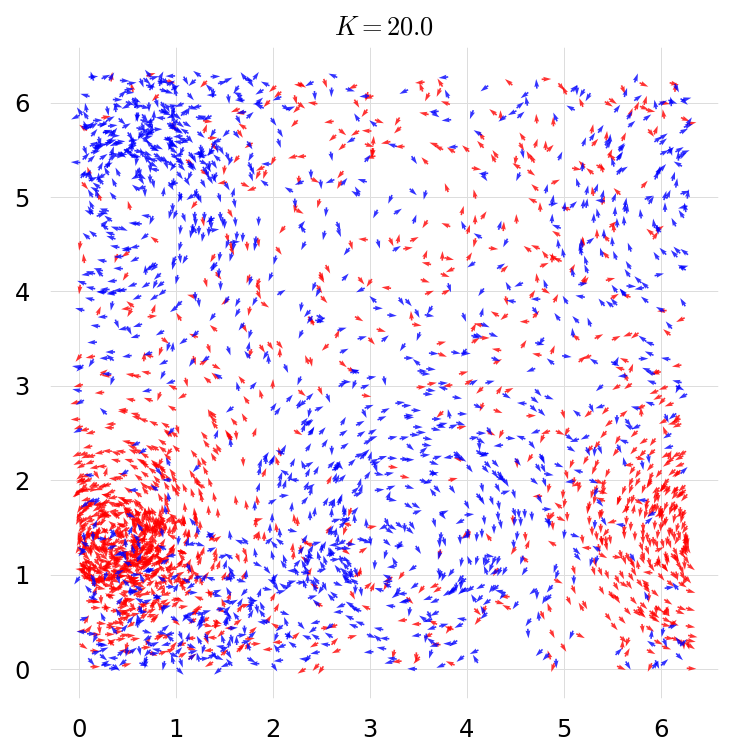

In [66]:
fig, ax = plt.subplots(figsize=(6, 6))
positionX, phaseTheta = sa.get_state(index=-1)

class1 = model.omegaValue > 0
class2 = model.omegaValue < 0

ax.quiver(
    positionX[class1, 0], positionX[class1, 1],
    np.cos(phaseTheta[class1]), np.sin(phaseTheta[class1]), color='red', alpha=0.8
)
ax.quiver(
    positionX[class2, 0], positionX[class2, 1],
    np.cos(phaseTheta[class2]), np.sin(phaseTheta[class2]), color='blue', alpha=0.8
)
plt.title(f"$K={model.K}$")

In [50]:
centerX = tailX - model.speedV / np.array(totalDotTheta) * np.sin(phaseTheta)
centerX = np.mod(centerX, 2 * np.pi)

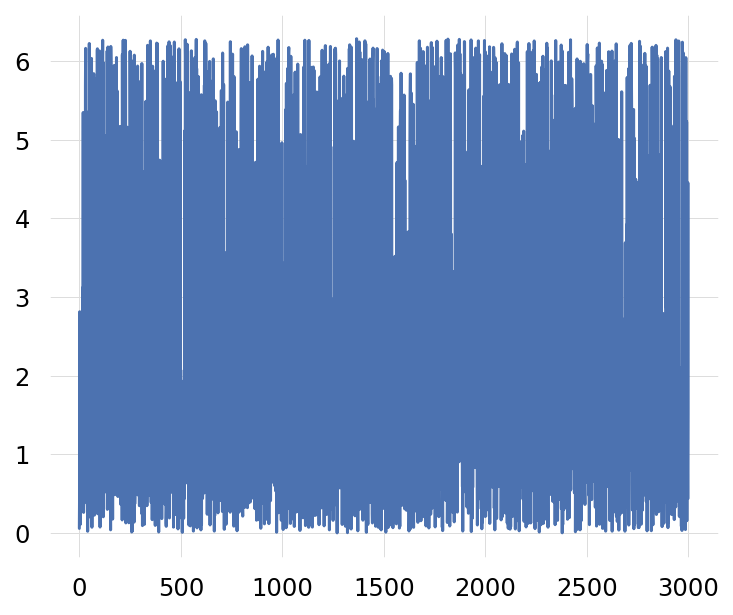

In [51]:
plt.plot(centerX[0])